In [1]:
from __future__ import division
from scipy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3d images
from matplotlib import cm                # colourmap
from math import pi
from math import sin
from numpy import linspace
from numpy import zeros
from numpy import meshgrid
from scipy import linalg                 # for implicit solution

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # for those with HD screens

In [3]:
def explicitDiffusion(Nt, Nx, L, T, D):

    dt = L/Nt
    dx = T/Nx
    alpha = D*dt/(dx*dx) # the CFL number

    x = linspace(0, L, Nx)
    t = linspace(0, T, Nt)
    u = zeros((Nx, Nt))

    # Initial condition - the concentration profile when t = 0
    u[:,0] = sin(pi*x)

    # Boundary condition: u[-1] refers to the *last* element of u
    u[0,:] = 0
    u[-1,:] = 0

    for j in range(Nt-1):
        for i in range(1,Nx-1):
            u[i,j+1] = u[i,j] + alpha*(u[i-1,j] - 2*u[i,j] + u[i+1,j])

    return u, x, t, alpha

TypeError: only size-1 arrays can be converted to Python scalars

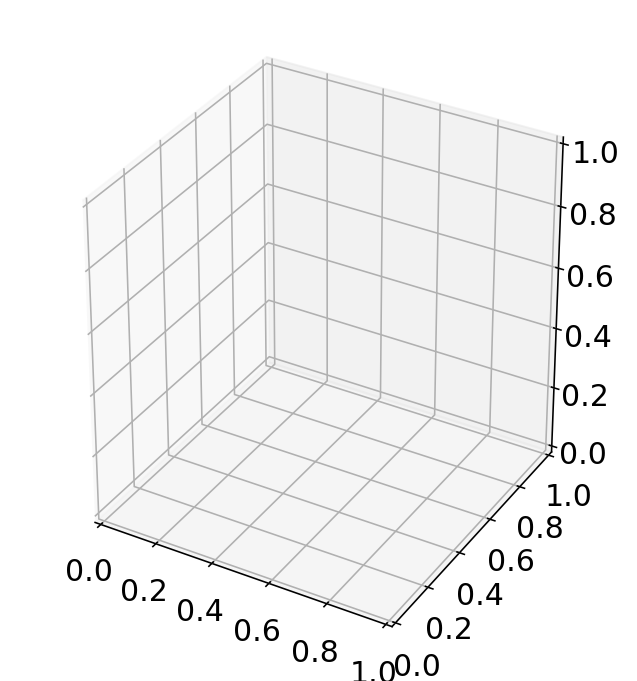

In [5]:
fig = plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15

# CFL = 0.25
ax = fig.add_subplot(121, projection='3d')
u, x, t, alpha = explicitDiffusion(Nt = 2500, Nx = 50, L= 1., T = 1., D = 0.25)
T, X = meshgrid(t,x)
N = u/u.max()
ax.plot_surface(T, X, u, linewidth=0, facecolors=cm.jet(N), rstride=1, cstride=50 )
ax.set_xlabel('Time $t$')
ax.set_ylabel('Distance $x$')
ax.set_zlabel('Concentration $u$')
ax.set_title('$\\alpha = 0.25$')

ax = fig.add_subplot(122, projection='3d')
u1, x1, t1, alpha1 = explicitDiffusion(Nt = 2500, Nx = 50, L= 1., T = 1., D = 0.505)
T1, X1 = meshgrid(t1,x1)
N1 = u1/1.
ax.plot_surface(T1, X1, u1, linewidth=0, facecolors=cm.jet(N1), rstride=1, cstride=50 )
ax.set_xlabel('Time $t$')
ax.set_ylabel('Distance $x$')
ax.set_zlabel('Concentration $u$')
ax.set_title('$\\alpha = 0.505$')
# ax.set_zlim3d(0, 1)

plt.tight_layout() # optimises the layout